In [1]:
import pandas as pd

# 날짜 컬럼 방지
def read_csv_auto_dates(path):
    # 1) 전체 파일을 먼저 읽기
    temp = pd.read_csv(path, low_memory=False)
    
    # 2) _at 로 끝나는 컬럼 자동 탐지
    date_cols = [col for col in temp.columns if col.endswith('_at')]
    
    # 3) 다시 날짜 컬럼을 datetime 으로 읽기
    return pd.read_csv(path, parse_dates=date_cols, low_memory=False)

# Load Files (전처리)
Acquisitions = read_csv_auto_dates("./clean_data_v1/clean_acquisitions_final.csv")
Degrees = read_csv_auto_dates("./clean_data_v1/clean_degrees_final.csv")
FundingRounds = read_csv_auto_dates("./clean_data_v1/clean_fr_final.csv")
Funds = read_csv_auto_dates("./clean_data_v1/clean_funds_final.csv")
Investments = read_csv_auto_dates("./clean_data_v1/clean_investments_final.csv")
Ipos = read_csv_auto_dates("./clean_data_v1/clean_ipos_final.csv")
Milestones = read_csv_auto_dates("./clean_data_v1/clean_milestones_final.csv")
Objects = read_csv_auto_dates("./clean_data_v1/clean_objects_final.csv")
People = read_csv_auto_dates("./clean_data_v1/clean_people_final.csv")
Offices = read_csv_auto_dates("./clean_data_v1/clean_offices_final.csv")
Relationships = read_csv_auto_dates("./clean_data_v1/clean_relationships_final.csv")

# Load Files (작업용 전처리)
company = read_csv_auto_dates("./entity_type/objects_company.csv")
finorg = read_csv_auto_dates("./entity_type/objects_finorg.csv")
person = read_csv_auto_dates("./entity_type/objects_person.csv")
product = read_csv_auto_dates("./entity_type/objects_product.csv")

# Load Files (join)
acqusitions_company = read_csv_auto_dates("./EDA's join/acqusitions_company.csv")
fr_company = read_csv_auto_dates("./EDA's join/fr_company.csv")
ipos_company = read_csv_auto_dates("./EDA's join/ipos_company.csv")
startup_system = read_csv_auto_dates("./EDA's join/startup_system.csv")

print("="*60)
print("Dataset 로드 완료!")
print("="*60)

Dataset 로드 완료!


In [2]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


# 한글 안깨지게 맥북용
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# Acquisitions 분석 : 인수된 스타트업의 특징
- 어떤 산업이 많이 인수되었는가 ? 
    - 산업별로 평균 조달 금액은 ?
    - 연도별로 어떤 산업이 많이 인수 되었나 ?
- 어느 도시에서 많이 인수되었는가 ?
- 인수까지 평균 소요 시간은 ? (투자 라운드별)
- 어떤 product가 인수 되었는가 ? 
    - 상장사 별로 평균 조달 금액 ?

Acquisition 금액 높은 산업

## 산업별

In [3]:
acqusitions_company

,acquisition_id,acquiring_c_id,acquired_c_id,term_code,price_amount,price_currency_code,acquired_at,is_acq_price_private,is_acquisitions_acq_at_missing,price_amount_usd,...,post_money_valuation_usd,participants,is_first_round,is_last_round,funded_year,funded_quarter,cat_fr_type,num_fr_type,log_participants,is_fr_raised_private
0,1,c:11,c:10,NaN,2.000000e+07,USD,2007-05-30,0,0,2.000000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,c:59,c:72,cash,0.000000e+00,USD,2007-07-01,0,0,0.000000e+00,...,NaN,1.0,1.0,1.0,2006.0,2006Q1,series-a,1.0,0.693147,0.0
2,8,c:24,c:132,cash,2.800000e+08,USD,2007-05-01,0,0,2.800000e+08,...,NaN,1.0,1.0,1.0,2006.0,2006Q2,series-a,1.0,0.693147,0.0
3,9,c:59,c:155,cash,0.000000e+00,USD,2007-06-01,0,0,0.000000e+00,...,NaN,0.0,0.0,1.0,2004.0,2004Q2,series-a,1.0,0.000000,0.0
4,9,c:59,c:155,cash,0.000000e+00,USD,2007-06-01,0,0,0.000000e+00,...,NaN,4.0,1.0,0.0,2005.0,2005Q2,series-b,2.0,1.609438,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,10525,c:267859,c:285995,stock,2.220000e+08,USD,2013-12-11,0,0,2.220000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11929,10526,c:285493,c:286006,NaN,NaN,USD,2013-12-09,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11930,10527,c:223792,c:220208,NaN,2.600000e+10,USD,2007-07-03,0,0,2.600000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11931,10528,c:227620,c:286176,cash,5.240000e+07,USD,2013-12-12,0,0,5.240000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '산업별 인수된 회사 수')

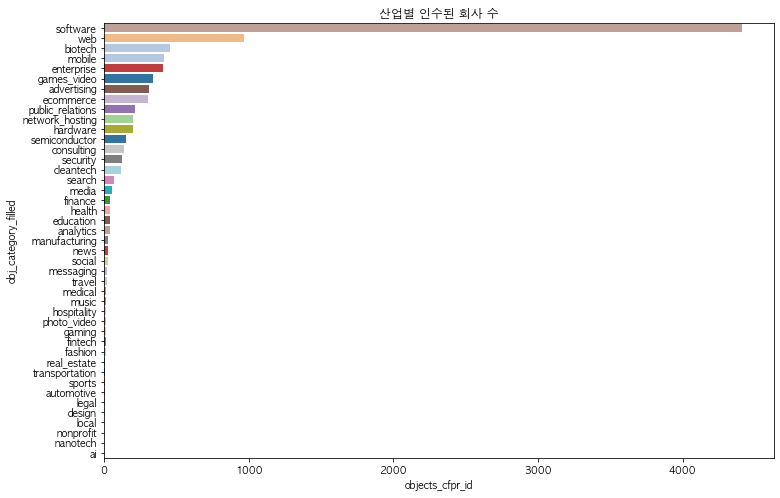

In [4]:
# 산업별 인수된 회사 수
industry_acqusition_cnt = (acqusitions_company.groupby('obj_category_filled')['objects_cfpr_id']
                       .nunique().reset_index().sort_values('objects_cfpr_id', ascending=False))
# 색 지정
# 1) 전체 산업 리스트
industry = acqusitions_company['obj_category_filled'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(industry))

# 3) obj_category_filled → color 매핑 딕셔너리
cat_palette = dict(zip(industry, base_colors))

# 시각화
plt.figure(figsize=(12, 8))

# 산업별 인수된 건수 수평 막대 그래프
sns.barplot(data=industry_acqusition_cnt, x='objects_cfpr_id', y='obj_category_filled', palette=cat_palette, hue='obj_category_filled')
plt.title('산업별 인수된 회사 수')

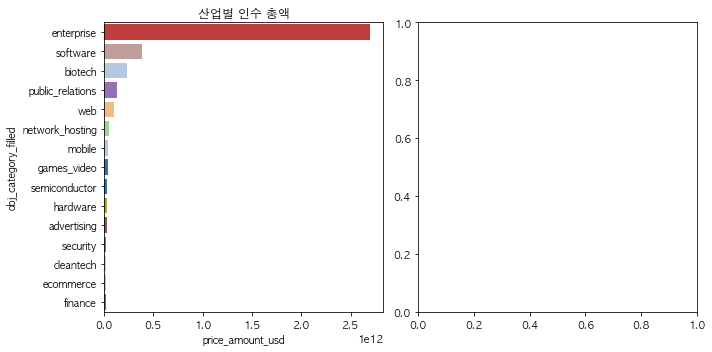

In [5]:
#############################
# 결측값이 너무 많아서 왜곡됨 ... 
#############################

# 산업별 기본 인수액
acquisition_total_amount = (acqusitions_company.groupby('obj_category_filled')['price_amount_usd']
                       .sum().reset_index().sort_values('price_amount_usd', ascending=False)).head(15)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 색 지정
# 1) 전체 지역 리스트
industry = acqusitions_company['obj_category_filled'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(industry))

# 3) obj_category_filled → color 매핑 딕셔너리
cat_palette = dict(zip(industry, base_colors))

# 산업별 ipo 자금 조달 총액 수평 막대 그래프
sns.barplot(data=acquisition_total_amount, x='price_amount_usd', y='obj_category_filled', palette=cat_palette, hue='obj_category_filled', ax=axes[0])
axes[0].set_title('산업별 인수 총액')

plt.tight_layout()
plt.show()

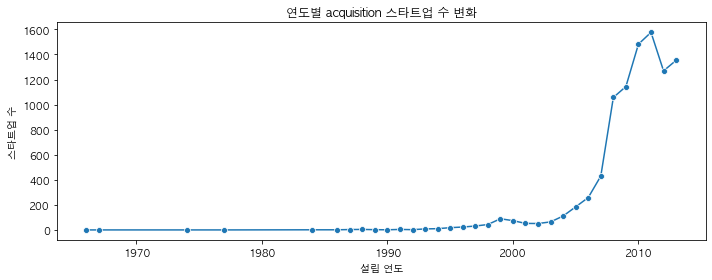

In [6]:
# 연도별로 acquisition 건수
acqusitions_company['acqusition_public_year'] = pd.to_datetime(acqusitions_company['acquired_at'], errors='coerce').dt.year

# 연도, 산업 없는 행은 제거
df_year_ind = (
    acqusitions_company
    .dropna(subset=['acqusition_public_year', 'obj_category_filled'])
    .groupby(['acqusition_public_year', 'obj_category_filled'])['objects_cfpr_id']
    .nunique()   
    .reset_index(name='new_startups')
)

year_trend = (
    df_year_ind
    .groupby('acqusition_public_year')['new_startups']
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 4))
sns.lineplot(data=year_trend, x='acqusition_public_year', y='new_startups', marker='o')
plt.title('연도별 acquisition 스타트업 수 변화')
plt.xlabel('설립 연도')
plt.ylabel('스타트업 수')
plt.tight_layout()
plt.show()


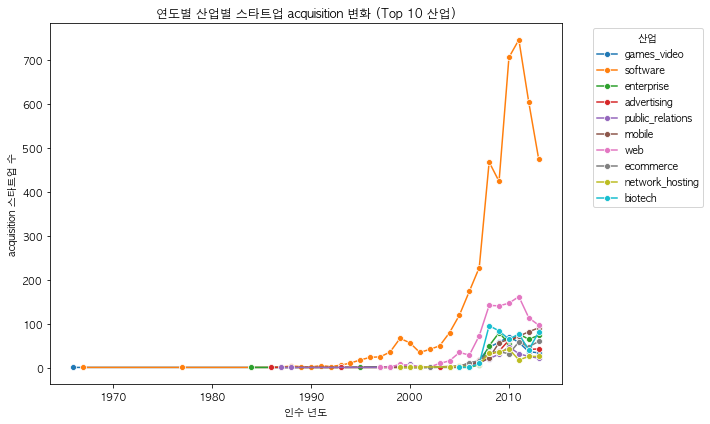

In [7]:
# 전체 기간 기준 상위 10개 산업 선정
top10_ind = (
    df_year_ind.groupby('obj_category_filled')['new_startups'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top = df_year_ind[df_year_ind['obj_category_filled'].isin(top10_ind)]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_top,
    x='acqusition_public_year',
    y='new_startups',
    hue='obj_category_filled',
    marker='o'
)
plt.title('연도별 산업별 스타트업 acquisition 변화 (Top 10 산업)')
plt.xlabel('인수 년도')
plt.ylabel('acquisition 스타트업 수')
plt.legend(title='산업', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 고부가가치 인수 산업
원금 < 인수가

In [8]:
acqusitions_company

,acquisition_id,acquiring_c_id,acquired_c_id,term_code,price_amount,price_currency_code,acquired_at,is_acq_price_private,is_acquisitions_acq_at_missing,price_amount_usd,...,participants,is_first_round,is_last_round,funded_year,funded_quarter,cat_fr_type,num_fr_type,log_participants,is_fr_raised_private,acqusition_public_year
0,1,c:11,c:10,NaN,2.000000e+07,USD,2007-05-30,0,0,2.000000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
1,7,c:59,c:72,cash,0.000000e+00,USD,2007-07-01,0,0,0.000000e+00,...,1.0,1.0,1.0,2006.0,2006Q1,series-a,1.0,0.693147,0.0,2007.0
2,8,c:24,c:132,cash,2.800000e+08,USD,2007-05-01,0,0,2.800000e+08,...,1.0,1.0,1.0,2006.0,2006Q2,series-a,1.0,0.693147,0.0,2007.0
3,9,c:59,c:155,cash,0.000000e+00,USD,2007-06-01,0,0,0.000000e+00,...,0.0,0.0,1.0,2004.0,2004Q2,series-a,1.0,0.000000,0.0,2007.0
4,9,c:59,c:155,cash,0.000000e+00,USD,2007-06-01,0,0,0.000000e+00,...,4.0,1.0,0.0,2005.0,2005Q2,series-b,2.0,1.609438,0.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,10525,c:267859,c:285995,stock,2.220000e+08,USD,2013-12-11,0,0,2.220000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0
11929,10526,c:285493,c:286006,NaN,NaN,USD,2013-12-09,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0
11930,10527,c:223792,c:220208,NaN,2.600000e+10,USD,2007-07-03,0,0,2.600000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
11931,10528,c:227620,c:286176,cash,5.240000e+07,USD,2013-12-12,0,0,5.240000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13750/2085548217.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


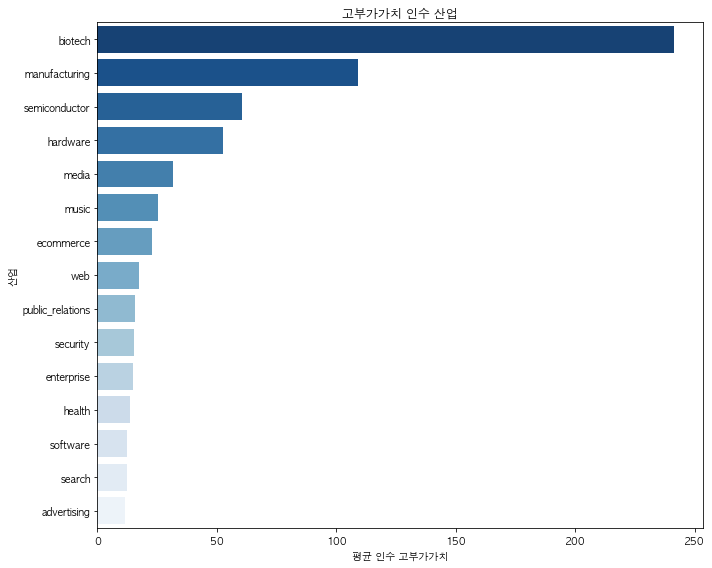

In [23]:
# 원금 계산 
total_invested = (acqusitions_company.groupby('acquired_c_id')
                   .agg(
                       total_funding = ('raised_amount_usd', 'sum'), # 투자 받은 금액
                       price_amount = ('price_amount_usd', 'first'), # 인수 금액
                       obj_category_filled = ('obj_category_filled', 'first') 
                   )
                   .reset_index()
                   .sort_values('total_funding', ascending=False)
)

# 0 또는 결측 제거
total_invested = total_invested[
    total_invested['total_funding'].notna() & 
    (total_invested['total_funding'] > 0) &
    total_invested['price_amount'].notna() & 
    (total_invested['price_amount'] > 0)
]

# Exit 가치 계산
total_invested['exit_multiple'] = total_invested['price_amount'] / total_invested['total_funding']

# 산업별 고부가가치 인수
acq_industry_multiple = (
    total_invested
    .groupby('obj_category_filled')['exit_multiple']
    .mean()
    .reset_index()
    .sort_values('exit_multiple', ascending=False)
)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=acq_industry_multiple.head(15),
    x='exit_multiple',
    y='obj_category_filled',
    palette='Blues_r'
)
plt.title('고부가가치 인수 산업')
plt.xlabel('평균 인수 고부가가치')
plt.ylabel('산업')
plt.tight_layout()
plt.show()


### price 가치 금액 공개 여부 차이 
is_acq_price_private 에 따른 산업 차이

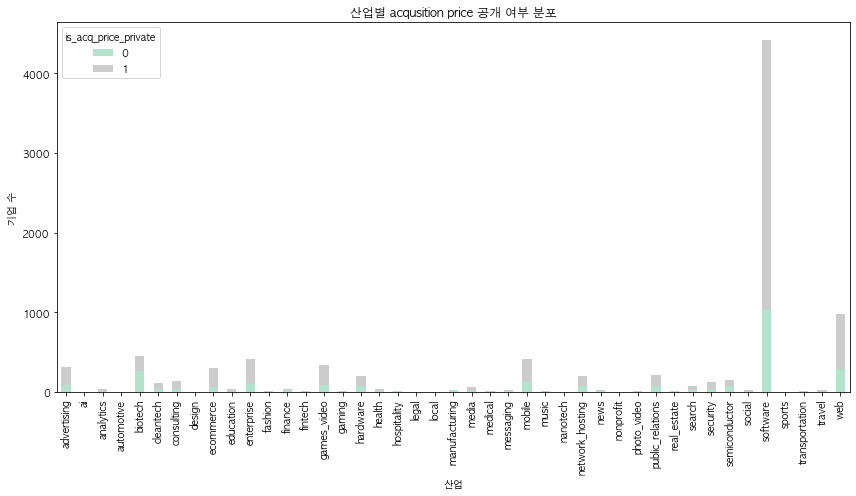

In [24]:
# 산업별 price 가치 금액 공개 여부 차이 

val_pivot = (
    acqusitions_company.groupby(['obj_category_filled', 'is_acq_price_private'])['objects_cfpr_id']
    .nunique()
    .reset_index()
)

val_pivot = val_pivot.pivot(
    index='obj_category_filled',
    columns='is_acq_price_private',
    values='objects_cfpr_id'
).fillna(0)

val_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Pastel2'
)

plt.title('산업별 acqusition price 공개 여부 분포')
plt.xlabel('산업')
plt.ylabel('기업 수')
plt.tight_layout()
plt.show()


In [25]:
# 산업별로 acquisition 까지 걸린 시간

# 회사별 첫 투자일, acquisition 날짜, 산업 가져오기
company_exit = (
    acqusitions_company
    .groupby('acquired_c_id')
    .agg(
        first_funded_at = ('funded_at', 'min'),
        acquisition_at  = ('acquired_at', 'max'),
        obj_category_filled   = ('obj_category_filled', 'first')
    )
    .reset_index()
)

# 회사별 acquisition 까지 걸린 시간 
company_exit['time_to_acquisition_days']  = (company_exit['acquisition_at'] - company_exit['first_funded_at']).dt.days
company_exit['time_to_acquisition_years'] = company_exit['time_to_acquisition_days'] / 365

# acquisition 날짜 이상한 값 삭제 (이상값)
company_exit = company_exit[
    company_exit['time_to_acquisition_years'].notna() & (company_exit['time_to_acquisition_years'] > 0)
]

# 산업별 평균 acquisition 까지 걸린 시간
industry_time_to_ipo = (
    company_exit
    .groupby('obj_category_filled')['time_to_acquisition_years']
    .mean()
    .reset_index()
    .sort_values('time_to_acquisition_years')
)


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13750/751555957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


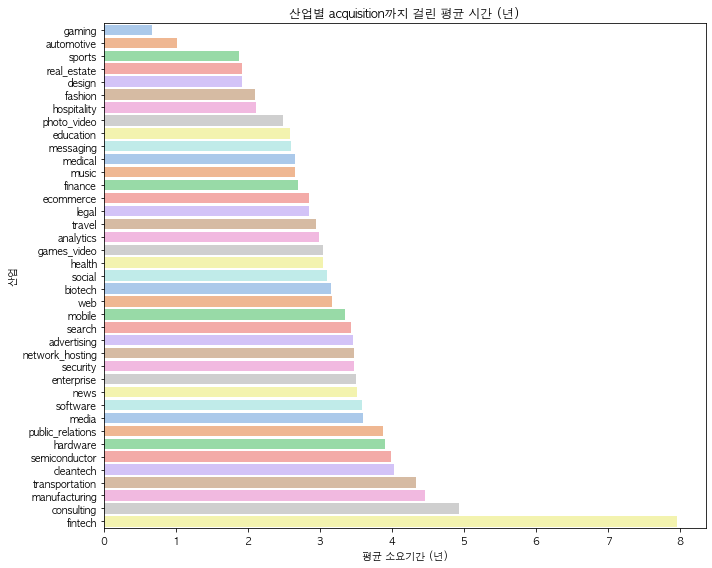

In [26]:
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(
    data=industry_time_to_ipo,
    x='time_to_acquisition_years',
    y='obj_category_filled',
    palette='pastel'
)
plt.title('산업별 acquisition까지 걸린 평균 시간 (년)')
plt.xlabel('평균 소요기간 (년)')
plt.ylabel('산업')
plt.tight_layout()
plt.show()

In [13]:
# acqusition까지 투자라운드별 평균적으로 소요되는 시간

# 회사별 첫 투자일, acqusition 날짜, 산업 가져오기
company_exit = (
    acqusitions_company
    .groupby('acquired_c_id')
    .agg(
        first_funded_at = ('funded_at', 'min'),
        acquisition_at   = ('acquired_at', 'max'),
        funding_round_type   = ('cat_fr_type', 'first')
    )
    .reset_index()
)

# 회사별 acqusition 까지 걸린 시간 
company_exit['time_to_acquisition_days']  = (company_exit['acquisition_at'] - company_exit['first_funded_at']).dt.days
company_exit['time_to_acquisition_years'] = company_exit['time_to_acquisition_days'] / 365

# acqusition 날짜 이상한 값 삭제 (이상값)
company_exit = company_exit[
    company_exit['time_to_acquisition_years'].notna() & (company_exit['time_to_acquisition_years'] > 0)
]

# 산업별 평균 acqusition 까지 걸린 시간
industry_time_to_ipo = (
    company_exit
    .groupby('funding_round_type')['time_to_acquisition_years']
    .mean()
    .reset_index()
    .sort_values('time_to_acquisition_years')
)


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13750/2384989908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


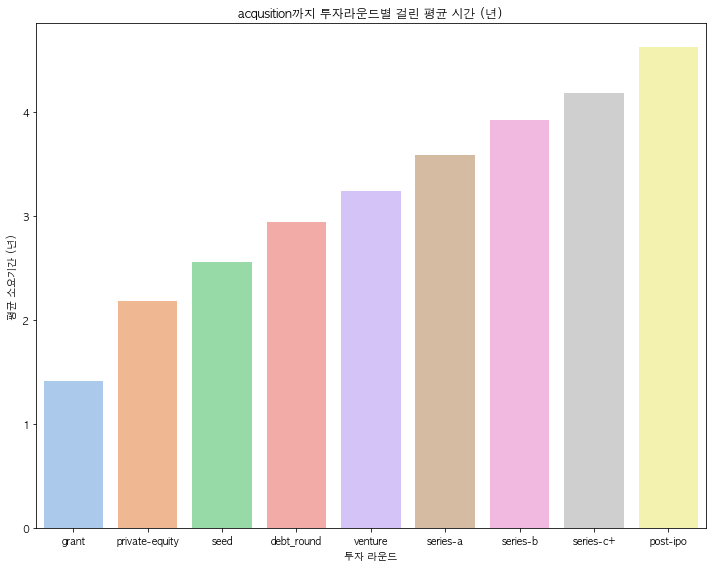

In [14]:
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(
    data=industry_time_to_ipo,
    x='funding_round_type',
    y='time_to_acquisition_years',
    palette='pastel'
)
plt.title('acqusition까지 투자라운드별 걸린 평균 시간 (년)')
plt.ylabel('평균 소요기간 (년)')
plt.xlabel('투자 라운드')
plt.tight_layout()
plt.show()

## 도시별

Text(0.5, 1.0, '도시별 인수된 회사수')

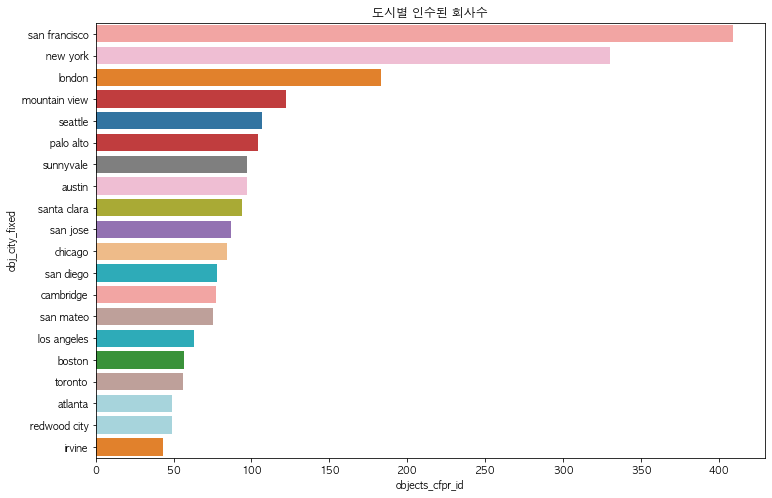

In [15]:
# 도시별 acqusition 회사 수
city_acqusition_cnt = (acqusitions_company.groupby('obj_city_fixed')['objects_cfpr_id']
                       .nunique().reset_index().sort_values('objects_cfpr_id', ascending=False)).head(20)
# 색 지정
# 1) 전체 지역 리스트
city = acqusitions_company['obj_city_fixed'].unique()

# 2) 도시 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(city))

# 3) obj_city_fixed → color 매핑 딕셔너리
cat_palette = dict(zip(city, base_colors))

# 시각화
plt.figure(figsize=(12, 8))

# 도시별 acqusition 회사 수 수평 막대 그래프
sns.barplot(data=city_acqusition_cnt, x='objects_cfpr_id', y='obj_city_fixed', palette=cat_palette, hue='obj_city_fixed')
plt.title('도시별 인수된 회사수' )

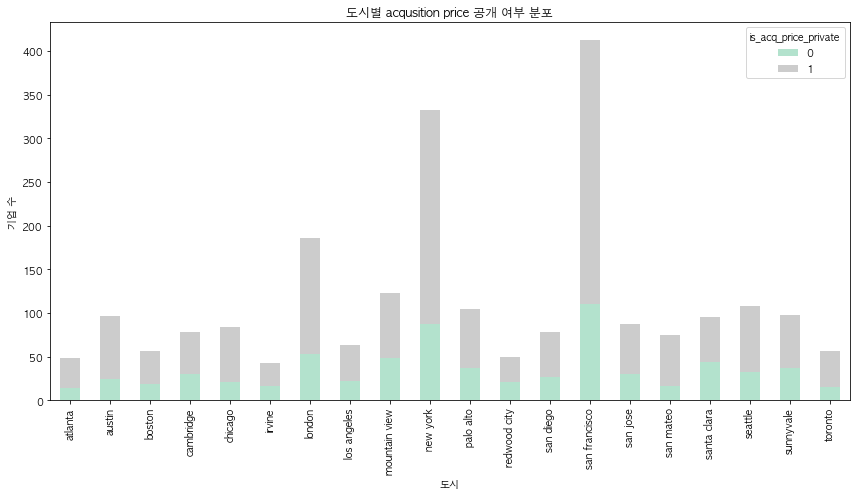

In [16]:
# 도시별 price amount 가치 금액 공개 여부 차이 

val_pivot = (
    acqusitions_company.groupby(['obj_city_fixed', 'is_acq_price_private'])['objects_cfpr_id']
    .nunique()
    .reset_index()
)
# 도시별 acqusition 기업수 기준 top10 도시 선정
top10_city = (
    acqusitions_company.groupby('obj_city_fixed')['objects_cfpr_id']
    .nunique()
    .sort_values(ascending=False)
    .head(20)
    .index
)
# 이 10개 도시만 필터링
val_city = acqusitions_company[acqusitions_company['obj_city_fixed'].isin(top10_city)]

# 공개/비공개 카운트 pivot 생성
val_pivot = (
    val_city.groupby(['obj_city_fixed', 'is_acq_price_private'])['objects_cfpr_id']
    .nunique()
    .reset_index()
)

val_pivot = val_pivot.pivot(
    index='obj_city_fixed',
    columns='is_acq_price_private',
    values='objects_cfpr_id'
).fillna(0)

# 시각화
val_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Pastel2'
)

plt.title('도시별 acqusition price 공개 여부 분포')
plt.xlabel('도시')
plt.ylabel('기업 수')
plt.tight_layout()
plt.show()


In [17]:
# 도시별로 acquistion 까지 걸린 시간

# 회사별 첫 투자일, acquistion 날짜, 도시 가져오기
company_exit = (
    acqusitions_company
    .groupby('acquired_c_id')
    .agg(
        first_funded_at = ('funded_at', 'min'),
        acquisition_at   = ('acquired_at', 'max'),
        city   = ('obj_city_fixed', 'first')
    )
    .reset_index()
)

# 회사별 acquistion 까지 걸린 시간 
company_exit['time_to_acquistion_days']  = (company_exit['acquisition_at'] - company_exit['first_funded_at']).dt.days
company_exit['time_to_acquistion_years'] = company_exit['time_to_acquistion_days'] / 365

# acquistion 날짜 이상한 값 삭제 (이상값)
company_exit = company_exit[
    company_exit['time_to_acquistion_years'].notna() & (company_exit['time_to_acquistion_years'] > 0)
]

# exit 도시별 건수 파악 → top20 선택
top_cities = (
    company_exit['city'].value_counts()
    .head(20)
    .index
)

filtered_city_exit = company_exit[company_exit['city'].isin(top_cities)]

# 도시별 평균 acquistion 까지 걸린 시간
city_time_to_acquistion = (
    filtered_city_exit
    .groupby('city')['time_to_acquistion_years']
    .mean()
    .reset_index()
    .sort_values('time_to_acquistion_years')
)


/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13750/2985243268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


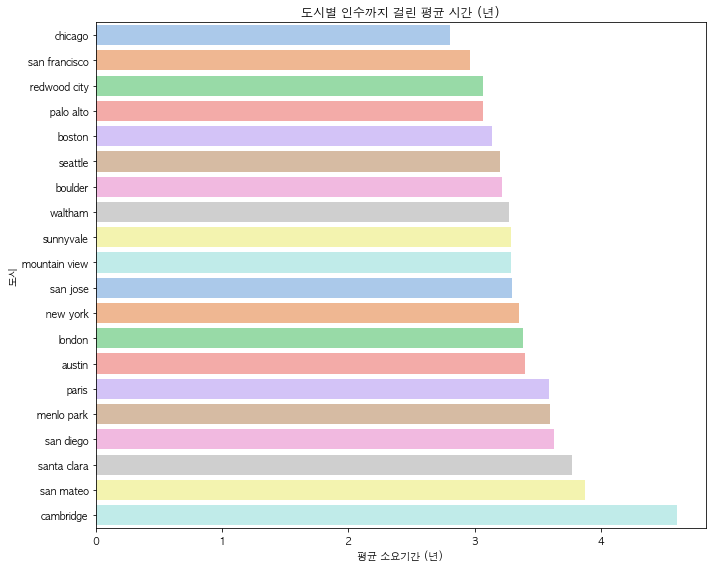

In [18]:
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(
    data=city_time_to_acquistion,
    x='time_to_acquistion_years',
    y='city',
    palette='pastel'
)
plt.title('도시별 인수까지 걸린 평균 시간 (년)')
plt.xlabel('평균 소요기간 (년)')
plt.ylabel('도시')
plt.tight_layout()
plt.show()

### 제품별

In [19]:
# 제품별 Acquisitions 분포

# Acquisitions -> product ←> funding_rounds merge
company_product = (
    Acquisitions
    .merge(product, how='left', left_on='acquired_c_id', right_on='parent_c_id')
    .merge(FundingRounds, how='left', left_on='parent_c_id', right_on='fr_c_id')
)

/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13750/1731204685.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_ipo_cnt, x='n_products', y='Acquisition_company_cnt', palette='pastel')


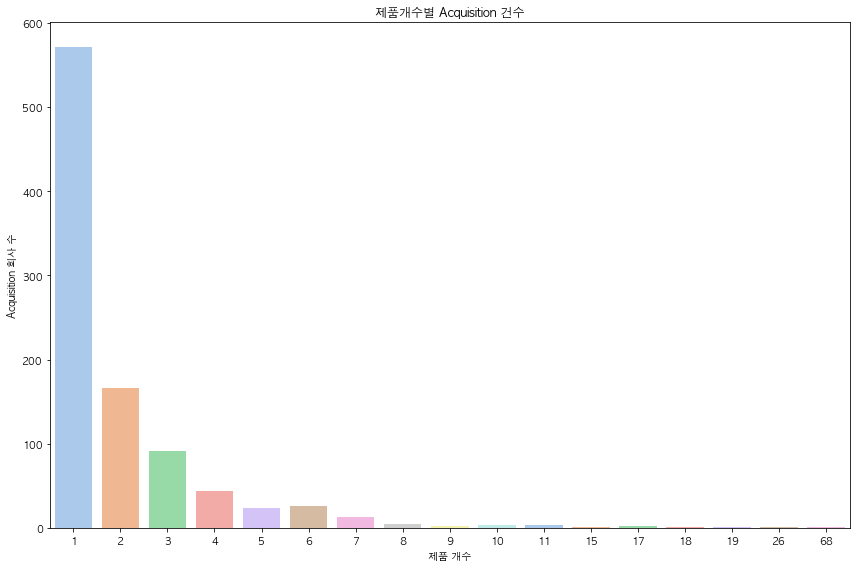

In [20]:
# 제품개수별 Acquisition 분포

# 제품개수별 회사 수
company_level = (
    company_product
    .groupby('parent_c_id')
    .agg(
        n_products = ('objects_cfpr_id', 'nunique'),     # 회사가 가진 제품 개수
        n_rounds   = ('funding_round_id', 'nunique')       # 그 회사의 투자 라운드 개수
    )
    .reset_index()
)
# 제품개수별 Acquisition 회사 수
product_ipo_cnt = (
    company_level
    .groupby('n_products')['parent_c_id']
    .nunique()  # 회사 수
    .reset_index(name='Acquisition_company_cnt')
    .sort_values('Acquisition_company_cnt', ascending=False)
)

# 시각화
plt.figure(figsize=(12, 8))

# 제품개수별 Acquisition 건수 수평 막대 그래프
sns.barplot(data=product_ipo_cnt, x='n_products', y='Acquisition_company_cnt', palette='pastel')
plt.title('제품개수별 Acquisition 건수')
plt.xlabel('제품 개수')
plt.ylabel('Acquisition 회사 수')
plt.tight_layout()
plt.show()

### 투자 라운드별

grant 받은 회사들 중 ipo 된 회사 수

Text(0.5, 1.0, '투자라운드별 acqusition 건수')

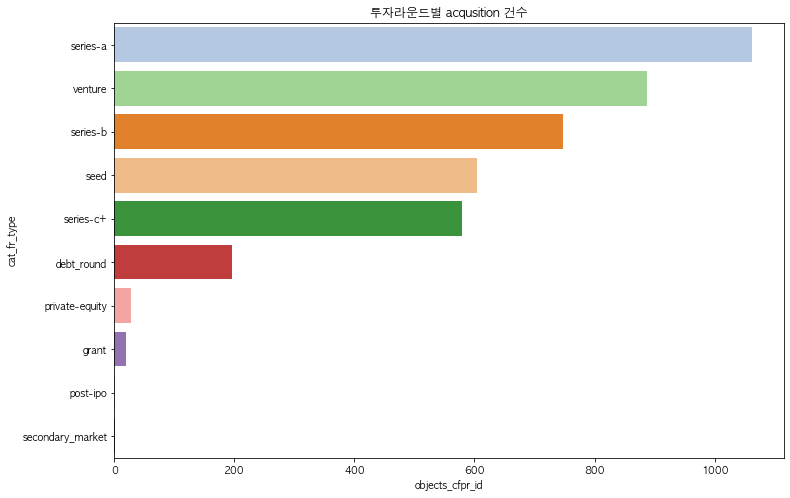

In [21]:
# 투자라운드 별 acqusition 된 회사 수
  
# 투자라운드별 acqusition 회사 수
round_ipo_cnt = (acqusitions_company.groupby('cat_fr_type')['objects_cfpr_id']
                       .nunique().reset_index().sort_values('objects_cfpr_id', ascending=False))
# 색 지정
# 1) 전체 지역 리스트
industry = acqusitions_company['cat_fr_type'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(industry))

# 3) cat_fr_type → color 매핑 딕셔너리
cat_palette = dict(zip(industry, base_colors))

# 시각화
plt.figure(figsize=(12, 8))

# 투자라운드별 acqusition 건수 수평 막대 그래프
sns.barplot(data=round_ipo_cnt, x='objects_cfpr_id', y='cat_fr_type', palette=cat_palette, hue='cat_fr_type')
plt.title('투자라운드별 acqusition 건수')

/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13750/3611988399.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


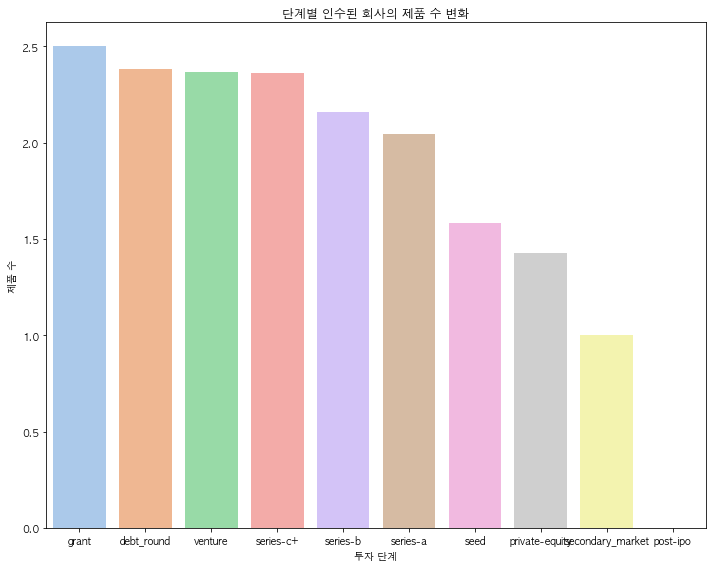

In [22]:
# acquisition의 투자라운드 별 회사 제품 갯수 변화
# product ←> funding_rounds merge
acquisition_company_product = (
    Acquisitions
    .merge(product, how='left', left_on='acquired_c_id', right_on='parent_c_id')
    .merge(FundingRounds, how='left', left_on='parent_c_id', right_on='fr_c_id')
)

# 회사별 제품 개수 계산
company_product_cnt = (
    acquisition_company_product
    .groupby('parent_c_id')['objects_cfpr_id']
    .nunique()
    .reset_index(name='n_products')
)
# 3) 투자 라운드 테이블에 회사별 제품 수 붙이기
fr_with_products = (
    FundingRounds
    .merge(company_product_cnt, how='left',
           left_on='fr_c_id', right_on='parent_c_id')
)

# 4) 라운드 단계별 평균 제품 수
round_product_trend = (
    fr_with_products
    .groupby('cat_fr_type')['n_products']
    .mean()
    .reset_index()
    .sort_values('n_products', ascending=False)
)

# 시각화 
plt.figure(figsize=(10, 8))
sns.barplot(
    data=round_product_trend,
    x='cat_fr_type',
    y='n_products',
    palette='pastel'
)
plt.title('단계별 인수된 회사의 제품 수 변화')
plt.xlabel('투자 단계')
plt.ylabel('제품 수')
plt.tight_layout()
plt.show()
